In [1]:
import matplotlib .pyplot as plt
import pandas as pd
import statsmodels .api as sm
from statsmodels .formula.api import ols

In [2]:
myData = pd. DataFrame ({'y' : [10,9,4,2,4,9],
'x1' : [7.4 ,1.2 ,3.1 ,4.8 ,2.8 ,6.5] ,
'x2' : [1 ,1 ,2 ,2 ,3 ,3]})
mod = ols("y~x1+x2", data=myData)
mod_matrix = pd. DataFrame (mod.exog ,columns=mod. exog_names )
print( mod_matrix )

   Intercept   x1   x2
0        1.0  7.4  1.0
1        1.0  1.2  1.0
2        1.0  3.1  2.0
3        1.0  4.8  2.0
4        1.0  2.8  3.0
5        1.0  6.5  3.0


In [4]:
myData['x2'] = myData['x2']. astype('category')

In [5]:
myData

,y,x1,x2
0,10,7.4,1
1,9,1.2,1
2,4,3.1,2
3,2,4.8,2
4,4,2.8,3
5,9,6.5,3


In [6]:
mod3 = ols("y~x1*C(x2)", data=myData)
mod3_matrix = pd. DataFrame (mod3.exog ,columns=mod3. exog_names )
print( mod3_matrix )


   Intercept  C(x2)[T.2]  C(x2)[T.3]   x1  x1:C(x2)[T.2]  x1:C(x2)[T.3]
0        1.0         0.0         0.0  7.4            0.0            0.0
1        1.0         0.0         0.0  1.2            0.0            0.0
2        1.0         1.0         0.0  3.1            3.1            0.0
3        1.0         1.0         0.0  4.8            4.8            0.0
4        1.0         0.0         1.0  2.8            0.0            2.8
5        1.0         0.0         1.0  6.5            0.0            6.5


Text(0, 0.5, 'Height')

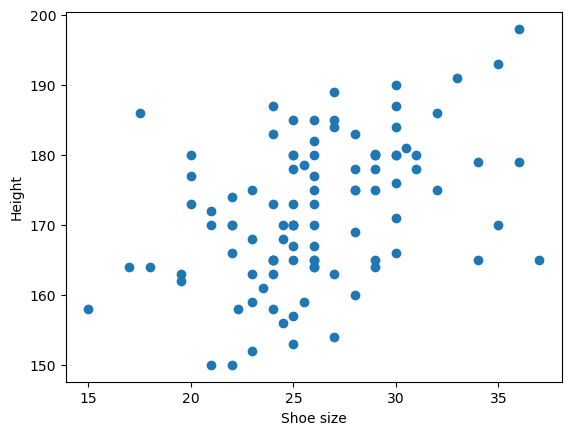

In [9]:
survey = pd.read_csv('survey.csv')
plt.scatter(survey.shoe , survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")

In [10]:
model = ols("height~shoe", data=survey) # define the model
fit = model.fit () #fit the model defined above
b0 , b1 = fit.params
print(fit.params)


Intercept    145.777570
shoe           1.004803
dtype: float64


Text(0, 0.5, 'Height')

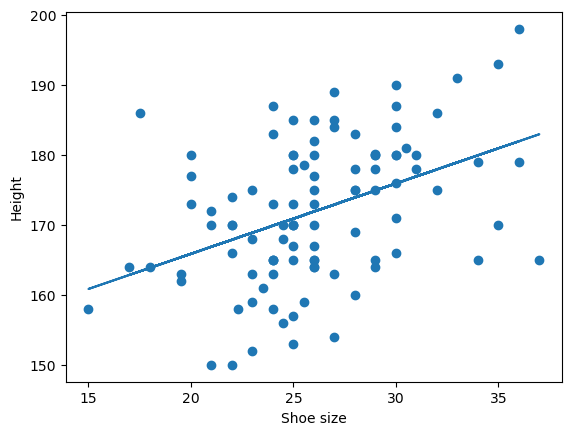

In [11]:
plt.plot(survey.shoe , b0 + b1*survey.shoe)
plt.scatter(survey.shoe , survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")


In [12]:
print(fit.summary ())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     21.28
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.20e-05
Time:                        11:50:29   Log-Likelihood:                -363.88
No. Observations:                 100   AIC:                             731.8
Df Residuals:                      98   BIC:                             737.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.7776      5.763     25.296      0.0

In [13]:
dir(fit)


['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [14]:
fit.pvalues [1]


1.1993996732477316e-05

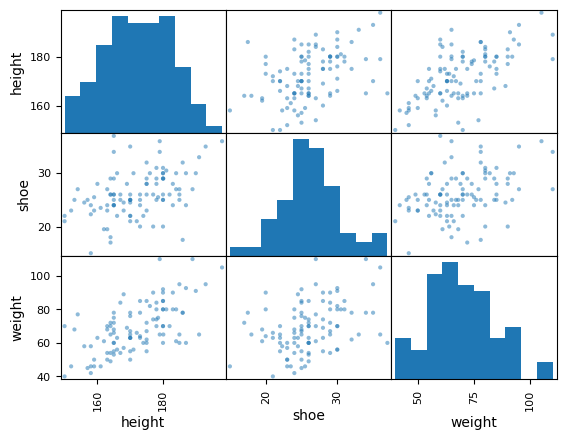

In [15]:
model = ols("height~shoe+weight", data=survey)
fit = model.fit ()
axes = pd. plotting . scatter_matrix (
    survey [['height','shoe','weight']])
plt.show ()


In [16]:
model = ols("height~weight+shoe", data=survey)
fit = model.fit ()
table = sm.stats.anova_lm(fit)
print(table)

            df       sum_sq      mean_sq          F        PR(>F)
weight     1.0  3993.860167  3993.860167  65.906502  1.503553e-12
shoe       1.0   442.882938   442.882938   7.308434  8.104688e-03
Residual  97.0  5878.091294    60.598879        NaN           NaN


In [17]:
x = {'shoe': [30.0] , 'weight': [75.0]} # new input (dictionary)
pred = fit. get_prediction (x)
pred. summary_frame (alpha =0.05).unstack ()


mean           0    176.261722
mean_se        0      1.054015
mean_ci_lower  0    174.169795
mean_ci_upper  0    178.353650
obs_ci_lower   0    160.670610
obs_ci_upper   0    191.852835
dtype: float64

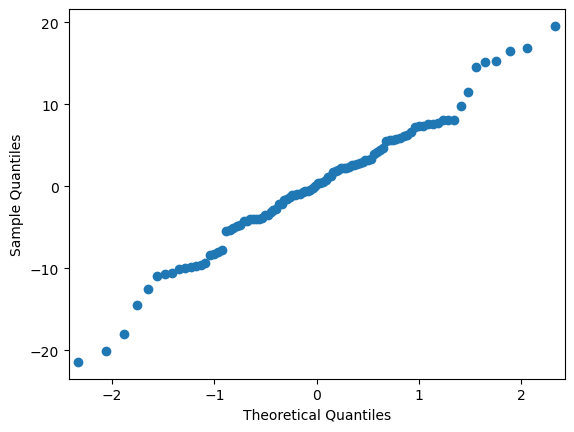

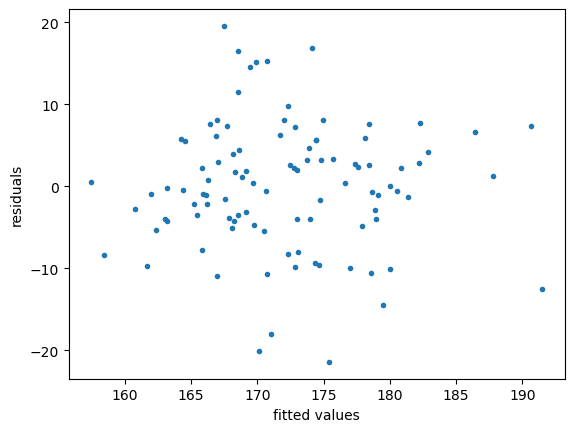

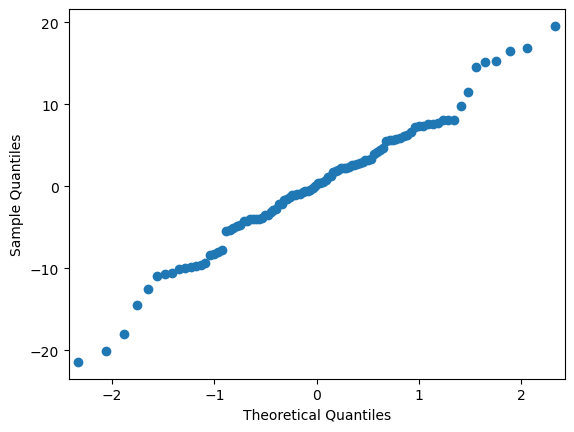

In [18]:
plt.plot(fit.fittedvalues ,fit.resid ,'.')
plt.xlabel("fitted values")
plt.ylabel("residuals")
sm.qqplot(fit.resid)

In [21]:
bwt = sm.datasets. get_rdataset ("birthwt","MASS").data
ftv1 = (bwt['ftv'] >=1).astype(int)
ptl1 = (bwt['ptl'] >=1).astype(int)
remaining_features = {'lwt', 'age', 'C(ui)', 'smoke',
                      'C(ht)', 'ftv1', 'ptl1'}
selected_features = []
while remaining_features :
    PF = [] #list of (P value , feature)
    for f in remaining_features :
        temp = selected_features + [f] #temporary list of features
        formula = 'bwt~' + '+'.join(temp)
        fit = ols(formula ,data=bwt).fit ()
        pval= fit.pvalues [-1]
        if pval < 0.05:
            PF.append ((pval ,f))
    if PF: #if not empty
        PF.sort(reverse=True)
        (best_pval , best_f) = PF.pop ()
        remaining_features .remove(best_f)
        print('feature {} with P-value = {:.2E}'.
            format(best_f , best_pval ))
        selected_features .append(best_f)
    else:
        break

feature C(ui) with P-value = 7.52E-05
feature C(ht) with P-value = 1.08E-02
feature lwt with P-value = 6.01E-03
feature smoke with P-value = 1.66E-02


In [22]:
formula = 'bwt~lwt+age+C(race)+ smoke'
bwt_model = ols(formula , data=bwt).fit ()
print( bwt_model .summary ())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     6.373
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.76e-05
Time:                        11:53:47   Log-Likelihood:                -1498.4
No. Observations:                 189   AIC:                             3009.
Df Residuals:                     183   BIC:                             3028.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2839.4334    321.435      8.834   

In [23]:
formula = 'bwt~age*smoke'
bwt_model = ols(formula , data=bwt).fit ()
print( bwt_model .summary ())


                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.577
Date:                Mon, 04 Mar 2024   Prob (F-statistic):            0.00407
Time:                        11:53:53   Log-Likelihood:                -1506.8
No. Observations:                 189   AIC:                             3022.
Df Residuals:                     185   BIC:                             3035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2406.0580    292.190      8.235      0.0